In [100]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By 
from selenium.webdriver.chrome.service import Service 
from webdriver_manager.chrome import ChromeDriverManager 
import time
import random

In [98]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import numpy as np

In [2]:
counties = pd.read_csv('integrated_counties.csv')

In [22]:
numeric_columns = counties.columns[1:7] 
counties[numeric_columns] = counties[numeric_columns].astype(str)

counties[numeric_columns] = counties[numeric_columns].apply(lambda x: x.str.replace(',', '').astype(int))

counties = counties.rename(columns={'Unemployment Rate': 'Unemployment_Rate', 'Urban Percent':'Urban_Percent', 'Rural Percent':'Rural_Percent'})

In [24]:
counties

,County,1980_pop,1990_pop,2000_pop,2010_pop,2020_pop,Median_Household_Income,Unemployment_Rate,Urban_Percent,Rural_Percent
0,Adair,9509,8409,8243,7682,7496,87135,3.9,0.00%,100.00%
1,Adams,5731,4866,4482,4029,3704,82639,4.2,0.00%,100.00%
2,Allamakee,15108,13855,14675,14330,14061,77754,3.2,0.00%,100.00%
3,Appanoose,15511,13743,13721,12887,12317,60169,6.1,42.80%,57.20%
4,Audubon,8559,7334,6830,6119,5674,75473,0.7,0.00%,100.00%
...,...,...,...,...,...,...,...,...,...,...
94,Winnebago,13010,12122,11723,10866,10679,86098,2.5,0.00%,100.00%
95,Winneshiek,21876,20847,21310,21056,20070,88023,2.1,39.80%,60.20%
96,Woodbury,100884,98276,103877,102172,105941,86194,4.5,83.90%,16.10%
97,Worth,9075,7991,7909,7598,7443,87750,3.3,0.00%,100.00%


In [130]:
counties['40_year_growth'] = ((counties['2020_pop'] - counties['1980_pop']) / counties['1980_pop']) * 100
counties['30_year_growth'] = ((counties['2020_pop'] - counties['1990_pop']) / counties['1990_pop']) * 100
counties['20_year_growth'] = ((counties['2020_pop'] - counties['2000_pop']) / counties['2000_pop']) * 100
counties['10_year_growth'] = ((counties['2020_pop'] - counties['2010_pop']) / counties['2010_pop']) * 100
counties['Growth_Rank'] = counties['10_year_growth'].rank(ascending=False, method='min').astype(int)
counties['Urban_Rank'] = counties['Urban_Percent'].rank(ascending=False, method='min').astype(int)
counties

,County,1980_pop,1990_pop,2000_pop,2010_pop,2020_pop,Median_Household_Income,Unemployment_Rate,Urban_Percent,Rural_Percent,40_year_growth,30_year_growth,20_year_growth,10_year_growth,Growth_Rank,Urban_Rank
0,Adair,9509,8409,8243,7682,7496,87135,3.9,0.00%,100.00%,-21.169418,-10.857415,-9.062235,-2.421244,54,63
1,Adams,5731,4866,4482,4029,3704,82639,4.2,0.00%,100.00%,-35.369046,-23.879984,-17.358322,-8.066518,95,63
2,Allamakee,15108,13855,14675,14330,14061,77754,3.2,0.00%,100.00%,-6.930103,1.486828,-4.183986,-1.877181,46,63
3,Appanoose,15511,13743,13721,12887,12317,60169,6.1,42.80%,57.20%,-20.591838,-10.376192,-10.232490,-4.423062,73,41
4,Audubon,8559,7334,6830,6119,5674,75473,0.7,0.00%,100.00%,-33.707209,-22.634306,-16.925329,-7.272430,94,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Winnebago,13010,12122,11723,10866,10679,86098,2.5,0.00%,100.00%,-17.916987,-11.903976,-8.905570,-1.720964,43,63
95,Winneshiek,21876,20847,21310,21056,20070,88023,2.1,39.80%,60.20%,-8.255623,-3.727155,-5.818864,-4.682751,78,45
96,Woodbury,100884,98276,103877,102172,105941,86194,4.5,83.90%,16.10%,5.012688,7.799463,1.986965,3.688878,15,5
97,Worth,9075,7991,7909,7598,7443,87750,3.3,0.00%,100.00%,-17.983471,-6.857715,-5.892022,-2.040011,49,63


In [34]:
counties.dtypes

County                      object
1980_pop                     int64
1990_pop                     int64
2000_pop                     int64
2010_pop                     int64
2020_pop                     int64
Median_Household_Income      int64
Unemployment_Rate          float64
Urban_Percent               object
Rural_Percent               object
40_year_growth             float64
30_year_growth             float64
20_year_growth             float64
10_year_growth             float64
dtype: object

In [5]:
# Question 1: Does a county’s ratio of urban to rural residents have any impact on the growth rate of the county?

In [148]:
urban_growth = counties.sort_values(by='Urban_Percent', ascending=False).head(10)
urban_growth = urban_growth[['County', 'Urban_Percent', '10_year_growth', 'Growth_Rank', 'Urban_Rank']]
display(urban_growth)

,County,Urban_Percent,10_year_growth,Growth_Rank,Urban_Rank
76,Polk,95.50%,14.341678,3,1
6,Black Hawk,87.00%,0.041193,29,2
81,Scott,86.70%,5.716482,10,3
56,Linn,86.30%,9.029665,6,4
96,Woodbury,83.90%,3.688878,15,5
51,Johnson,83.30%,16.787641,2,6
16,Cerro Gordo,79.70%,-2.319313,53,7
24,Dallas,78.70%,50.718984,1,8
84,Story,74.20%,10.045565,5,9
29,Dickinson,73.20%,6.215876,8,10


In [152]:
rural_growth = counties.sort_values(by='Urban_Percent', ascending=True).head(20)
rural_growth = rural_growth[['County', 'Urban_Percent', '10_year_growth', 'Growth_Rank', 'Urban_Rank']]
display(rural_growth)

,County,Urban_Percent,10_year_growth,Growth_Rank,Urban_Rank
0,Adair,0.00%,-2.421244,54,63
37,Grundy,0.00%,-0.995744,35,63
38,Guthrie,0.00%,-3.021727,57,63
40,Hancock,0.00%,-4.814390,79,63
42,Harrison,0.00%,-2.317792,52,63
44,Howard,0.00%,-1.014008,36,63
46,Ida,0.00%,-1.184934,37,63
47,Iowa,0.00%,1.877102,22,63
97,Worth,0.00%,-2.040011,49,63
53,Keokuk,0.00%,-4.547617,76,63


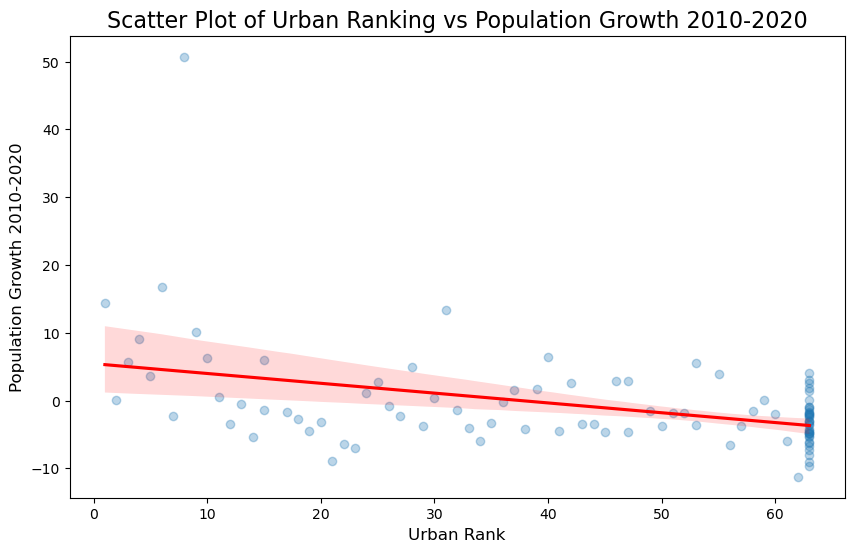

In [160]:
# create a scatter plot for Price (x) vs Points (y)
plt.figure(figsize=(10, 6))
sns.regplot(x="Urban_Rank", y="10_year_growth", data=counties, scatter_kws={"alpha": 0.3}, line_kws={"color": "red"})



# add titles and labels
plt.title("Scatter Plot of Urban Ranking vs Population Growth 2010-2020", fontsize=16)
plt.xlabel("Urban Rank", fontsize=12)
plt.ylabel("Population Growth 2010-2020", fontsize=12)

plt.show()

In [6]:
# Question 2: Which counties in Iowa saw the highest growth in population between the 2010 and 2020 Census? Similarly, which counties saw the highest percentage drop in population?

In [162]:
highest_growth = counties.sort_values(by='10_year_growth', ascending=False).head(10)
highest_growth = highest_growth[['County', '10_year_growth', 'Growth_Rank', 'Urban_Rank']]
display(highest_growth)

,County,10_year_growth,Growth_Rank,Urban_Rank
24,Dallas,50.718984,1,8
51,Johnson,16.787641,2,6
76,Polk,14.341678,3,1
90,Warren,13.365062,4,31
84,Story,10.045565,5,9
56,Linn,9.029665,6,4
83,Sioux,6.432471,7,40
29,Dickinson,6.215876,8,10
30,Dubuque,5.993401,9,15
81,Scott,5.716482,10,3


In [170]:
lowest_growth = counties.sort_values(by='10_year_growth', ascending=True).head(10)
lowest_growth = lowest_growth[['County', '10_year_growth', 'Growth_Rank', 'Urban_Rank']]
display(lowest_growth)

,County,10_year_growth,Growth_Rank,Urban_Rank
35,Fremont,-11.235049,99,62
26,Decatur,-9.601514,98,63
79,Ringgold,-9.121029,97,63
31,Emmet,-8.872064,96,21
1,Adams,-8.066518,95,63
4,Audubon,-7.272430,94,63
50,Jefferson,-7.005878,93,23
86,Taylor,-6.664556,92,63
32,Fayette,-6.566092,91,56
55,Lee,-6.432993,90,22


In [7]:
# Question 3: Does the average household income of a county have any effect on the county’s growth? What is the relationship between rural/urban status and income?

In [168]:
income_vs_growth = counties.sort_values(by='Median_Household_Income', ascending=False).head(10)
income_vs_growth = income_vs_growth[['County', 'Median_Household_Income','Growth_Rank','10_year_growth']]
income_vs_growth

,County,Median_Household_Income,Growth_Rank,10_year_growth
24,Dallas,130231,1,50.718984
51,Johnson,112575,2,16.787641
84,Story,109432,5,10.045565
90,Warren,107434,4,13.365062
60,Madison,105706,11,5.542445
64,Mills,100809,69,-3.818315
76,Polk,99161,3,14.341678
8,Bremer,98823,17,2.932938
7,Boone,97936,24,1.554778
56,Linn,96369,6,9.029665


In [126]:
income_vs_growth1 = counties.sort_values(by='Median_Household_Income', ascending=True).head(10)
income_vs_growth1 = income_vs_growth1[['County', 'Median_Household_Income', 'Growth_Rank', '10_year_growth']]
income_vs_growth1

,County,Median_Household_Income,Growth_Rank,10_year_growth
3,Appanoose,60169,73,-4.423062
26,Decatur,66754,98,-9.601514
89,Wapello,67016,33,-0.527719
50,Jefferson,68298,93,-7.005878
19,Clarke,70580,12,4.975232
88,Van Buren,70893,81,-4.848085
32,Fayette,71025,91,-6.566092
34,Franklin,72089,89,-6.189139
72,Page,72199,75,-4.525483
98,Wright,72665,50,-2.161917


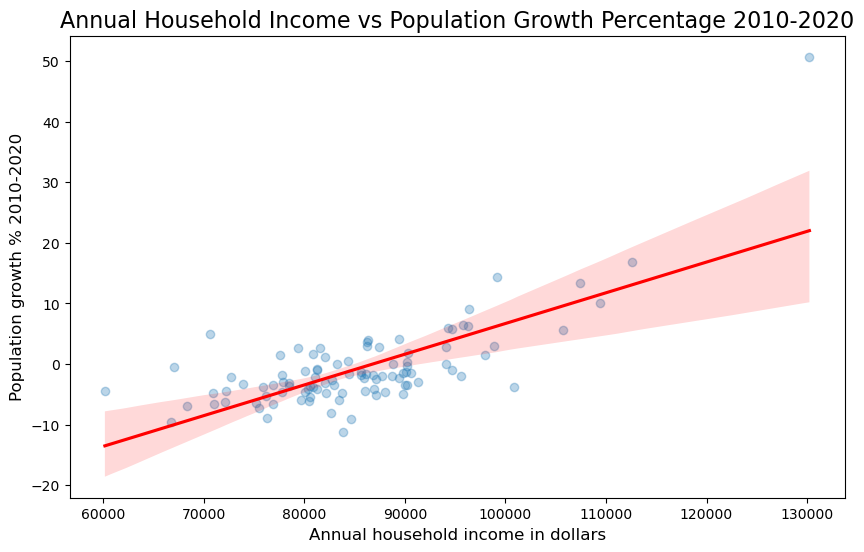

In [114]:
plt.figure(figsize=(10, 6))
sns.regplot(x="Median_Household_Income", y="10_year_growth", data=counties, scatter_kws={"alpha": 0.3}, line_kws={"color": "red"})  # add transparency and trendline

plt.title("Annual Household Income vs Population Growth Percentage 2010-2020", fontsize=16)
plt.xlabel("Annual household income in dollars", fontsize=12)
plt.ylabel("Population growth % 2010-2020", fontsize=12)

plt.show()


In [8]:
# Question 4: Do the unemployment levels of a county have an impact on the county’s population?

In [144]:
unemployment_vs_growth = counties.sort_values(by='Unemployment_Rate', ascending=False).head(10)
unemployment_vs_growth = unemployment_vs_growth[['County', 'Unemployment_Rate', 'Growth_Rank', '10_year_growth', 'Urban_Percent','Urban_Rank']]
unemployment_vs_growth

,County,Unemployment_Rate,Growth_Rank,10_year_growth,Urban_Percent,Urban_Rank
72,Page,6.6,75,-4.525483,66.20%,19
75,Pocahontas,6.3,59,-3.173735,0.00%,63
3,Appanoose,6.1,73,-4.423062,42.80%,41
87,Union,5.7,58,-3.159406,61.80%,20
63,Marshall,5.6,39,-1.335859,68.30%,15
84,Story,5.6,5,10.045565,74.20%,9
50,Jefferson,5.2,93,-7.005878,58.80%,23
6,Black Hawk,5.2,29,0.041193,87.00%,2
10,Buena Vista,5.0,19,2.778875,57.00%,25
88,Van Buren,4.9,81,-4.848085,0.00%,63


In [142]:
unemployment_vs_growth1 = counties.sort_values(by='Unemployment_Rate', ascending=True).head(10)
unemployment_vs_growth1 = unemployment_vs_growth1[['County', 'Unemployment_Rate', 'Growth_Rank', '10_year_growth', 'Urban_Percent', 'Urban_Rank']]
unemployment_vs_growth1

,County,Unemployment_Rate,Growth_Rank,10_year_growth,Urban_Percent,Urban_Rank
4,Audubon,0.7,94,-7.272430,0.00%,63
65,Mitchell,0.9,48,-1.958055,0.00%,63
7,Boone,1.3,24,1.554778,46.80%,37
14,Cass,1.4,86,-5.940097,50.30%,34
44,Howard,1.5,36,-1.014008,0.00%,63
92,Wayne,1.6,25,1.468062,0.00%,63
79,Ringgold,1.7,97,-9.121029,0.00%,63
35,Fremont,1.7,99,-11.235049,0.10%,62
13,Carroll,1.9,32,-0.269024,48.90%,36
25,Davis,2.0,13,4.078602,0.00%,63


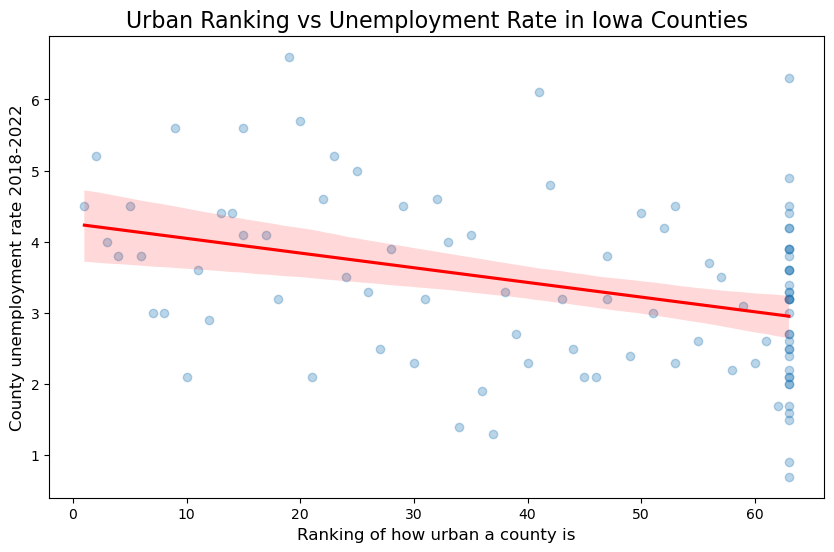

In [146]:
plt.figure(figsize=(10, 6))
sns.regplot(x="Urban_Rank", y="Unemployment_Rate", data=counties, scatter_kws={"alpha": 0.3}, line_kws={"color": "red"})  # add transparency and trendline

plt.title("Urban Ranking vs Unemployment Rate in Iowa Counties", fontsize=16)
plt.xlabel("Ranking of how urban a county is", fontsize=12)
plt.ylabel("County unemployment rate 2018-2022", fontsize=12)

plt.show()
